<a href="https://colab.research.google.com/github/marcado993/grupo22/blob/main/Union_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###DATA DE LOS JUGADORES

In [ ]:
path="/content/drive/MyDrive/JUGADORES.csv"

In [ ]:
df1 = pd.read_csv(path, index_col=0)

<ipython-input-82-1564a1965f12>:1: DtypeWarning: Columns (10,12,14,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path, index_col=0)


In [ ]:
df1

,fifa_update,fifa_update_date,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,year,month
0,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,65.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,2023.0,1.0
1,9.0,2023-01-13,M. Salah,90.0,90.0,115500000.0,270000.0,30.0,175.0,71,...,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,2023.0,1.0
2,9.0,2023-01-13,Casemiro,89.0,89.0,86000000.0,240000.0,30.0,185.0,84,...,90.0,88.0,87.0,13.0,14.0,16.0,12.0,12.0,2023.0,1.0
3,9.0,2023-01-13,H. Kane,89.0,89.0,105500000.0,240000.0,28.0,188.0,89,...,50.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,2023.0,1.0
4,9.0,2023-01-13,V. van Dijk,89.0,89.0,84500000.0,220000.0,30.0,193.0,92,...,91.0,91.0,86.0,13.0,10.0,13.0,11.0,11.0,2023.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113670,NaN,2001-01-01,D. Boer,NaN,NaN,NaN,NaN,31.0,NaN,84kg,...,NaN,12.0,11.0,68.0,64.0,NaN,68.0,71.0,2001.0,1.0
113671,NaN,2001-01-01,D. Boer,NaN,NaN,NaN,NaN,32.0,NaN,84kg,...,NaN,25.0,25.0,68.0,65.0,NaN,70.0,75.0,2001.0,1.0
113681,NaN,2011-01-01,M. Nafti,NaN,NaN,NaN,NaN,31.0,NaN,77kg,...,NaN,69.0,59.0,8.0,14.0,NaN,14.0,5.0,2011.0,1.0
113682,NaN,2011-01-01,M. Nafti,NaN,NaN,NaN,NaN,32.0,NaN,77kg,...,NaN,75.0,64.0,8.0,14.0,NaN,14.0,5.0,2011.0,1.0


### DATOS PARTIDOS

In [ ]:
path="/content/drive/MyDrive/matches_10y.csv"

In [ ]:
df2 = pd.read_csv(path, index_col=0)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8140 entries, 0 to 37
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          8140 non-null   object 
 1   time          6620 non-null   object 
 2   comp          8140 non-null   object 
 3   round         8140 non-null   object 
 4   day           8140 non-null   object 
 5   venue         8140 non-null   object 
 6   result        8140 non-null   object 
 7   gf            8140 non-null   float64
 8   ga            8140 non-null   float64
 9   opponent      8140 non-null   object 
 10  xg            4340 non-null   float64
 11  xga           4340 non-null   float64
 12  poss          6620 non-null   float64
 13  attendance    5740 non-null   float64
 14  captain       5860 non-null   object 
 15  formation     8140 non-null   object 
 16  referee       8140 non-null   object 
 17  match report  8140 non-null   object 
 18  notes         0 non-null      

In [ ]:
df2

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team
0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,Crystal Palace,...,Anthony Taylor,Match Report,NaN,10.0,2.0,14.6,0.0,0.0,2022,Arsenal
1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,Leicester City,...,Darren England,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,2022,Arsenal
2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,Bournemouth,...,Craig Pawson,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,2022,Arsenal
3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Fulham,...,Jarred Gillett,Match Report,NaN,22.0,8.0,15.5,0.0,0.0,2022,Arsenal
4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,Aston Villa,...,Robert Jones,Match Report,NaN,22.0,8.0,16.3,0.0,0.0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2013-04-20,NaN,Premier League,Matchweek 34,Sat,Home,L,0.0,2.0,Stoke City,...,Chris Foy,Match Report,NaN,NaN,NaN,NaN,0.0,NaN,2012,Queens Park Rangers
34,2013-04-28,NaN,Premier League,Matchweek 35,Sun,Away,D,0.0,0.0,Reading,...,Kevin Friend,Match Report,NaN,NaN,NaN,NaN,0.0,NaN,2012,Queens Park Rangers
35,2013-05-04,NaN,Premier League,Matchweek 36,Sat,Home,L,0.0,1.0,Arsenal,...,Jon Moss,Match Report,NaN,NaN,NaN,NaN,0.0,NaN,2012,Queens Park Rangers
36,2013-05-12,NaN,Premier League,Matchweek 37,Sun,Home,L,1.0,2.0,Newcastle Utd,...,Lee Probert,Match Report,NaN,NaN,NaN,NaN,1.0,NaN,2012,Queens Park Rangers


In [ ]:
df2.isnull().sum()

date               0
time            1520
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg              3800
xga             3800
poss            1520
attendance      2400
captain         2280
formation          0
referee            0
match report       0
notes           8140
sh              1520
sot             1520
dist            3803
pk                 0
pkatt           1520
season             0
team               0
dtype: int64

<Axes: >

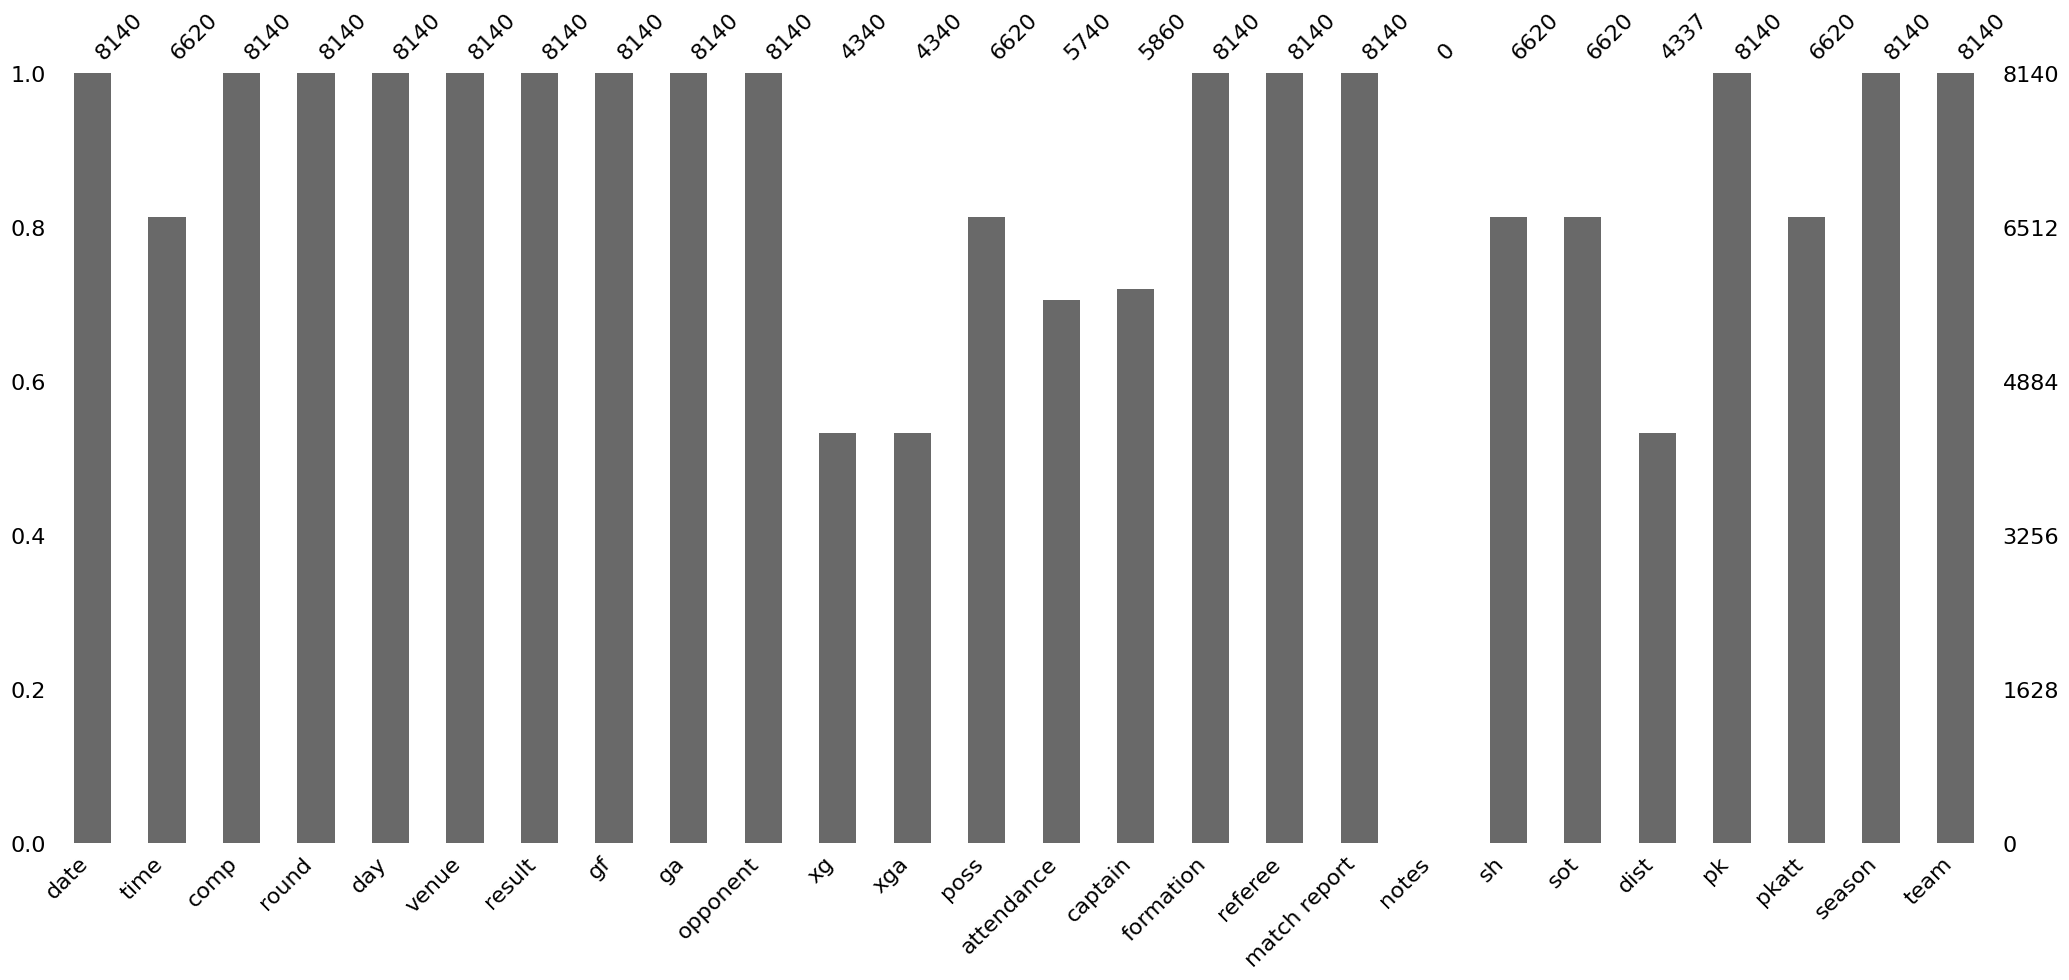

In [ ]:
msno.bar(df2)

In [ ]:
df2=df2[['date','venue','result','opponent', 'team','xg','xga','poss','attendance','formation','sh','sot','dist','pk','pkatt','season']]

In [ ]:
df2['date'] = pd.to_datetime(df2['date'], format="%Y/%m/%d")

<ipython-input-91-c67ad6c196fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'], format="%Y/%m/%d")


In [ ]:
df2['year'] = df2['date'].dt.year

<ipython-input-92-95696ea2b09c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['date'].dt.year


In [ ]:
df2['month'] = df2['date'].dt.month

<ipython-input-93-4638f1a6b90b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['date'].dt.month


In [ ]:
df2 = df2.replace({"Manchester Utd": "Manchester United", "Tottenham": "Tottenham Hotspur", "Newcastle Utd": "Newcastle United", "Brighton": "Brighton and Hove Albion", "Wolves": "Wolverhampton Wanderers", "Nott'ham Forest": "Nottingham Forest", "West Ham": "West Ham United", "West Brom": "West Bromwich Albion", "Sheffield Utd": "Sheffield United", "Huddersfield": "Huddersfield Town", "QPR": "Queens Park Rangers"})

In [ ]:
df2['year'].unique()

array([2022, 2023, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012])

In [ ]:
df2['result'].value_counts()

W    3102
L    3102
D    1936
Name: result, dtype: int64

In [ ]:
df2

,date,venue,result,opponent,team,xg,xga,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,year,month
0,2022-08-05,Away,W,Crystal Palace,Arsenal,1.0,1.2,44.0,25286.0,4-3-3,10.0,2.0,14.6,0.0,0.0,2022,2022,8
1,2022-08-13,Home,W,Leicester City,Arsenal,2.7,0.5,50.0,60033.0,4-3-3,19.0,7.0,13.0,0.0,0.0,2022,2022,8
2,2022-08-20,Away,W,Bournemouth,Arsenal,1.3,0.3,57.0,10423.0,4-3-3,14.0,6.0,14.8,0.0,0.0,2022,2022,8
3,2022-08-27,Home,W,Fulham,Arsenal,2.6,0.8,71.0,60164.0,4-3-3,22.0,8.0,15.5,0.0,0.0,2022,2022,8
4,2022-08-31,Home,W,Aston Villa,Arsenal,2.4,0.4,59.0,60012.0,4-3-3,22.0,8.0,16.3,0.0,0.0,2022,2022,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2013-04-20,Home,L,Stoke City,Queens Park Rangers,NaN,NaN,NaN,NaN,4-2-3-1,NaN,NaN,NaN,0.0,NaN,2012,2013,4
34,2013-04-28,Away,D,Reading,Queens Park Rangers,NaN,NaN,NaN,NaN,4-1-2-1-2◆,NaN,NaN,NaN,0.0,NaN,2012,2013,4
35,2013-05-04,Home,L,Arsenal,Queens Park Rangers,NaN,NaN,NaN,NaN,4-4-2,NaN,NaN,NaN,0.0,NaN,2012,2013,5
36,2013-05-12,Home,L,Newcastle United,Queens Park Rangers,NaN,NaN,NaN,NaN,4-4-2,NaN,NaN,NaN,1.0,NaN,2012,2013,5


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8140 entries, 0 to 37
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        8140 non-null   datetime64[ns]
 1   venue       8140 non-null   object        
 2   result      8140 non-null   object        
 3   opponent    8140 non-null   object        
 4   team        8140 non-null   object        
 5   xg          4340 non-null   float64       
 6   xga         4340 non-null   float64       
 7   poss        6620 non-null   float64       
 8   attendance  5740 non-null   float64       
 9   formation   8140 non-null   object        
 10  sh          6620 non-null   float64       
 11  sot         6620 non-null   float64       
 12  dist        4337 non-null   float64       
 13  pk          8140 non-null   float64       
 14  pkatt       6620 non-null   float64       
 15  season      8140 non-null   int64         
 16  year        8140 non-null 

### UNION DATOS JUGADORES Y PARTIDOS

In [ ]:
joined_df = pd.merge(df1, df2, on=["year", "team"])

In [ ]:
joined_df

,fifa_update,fifa_update_date,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,month_y
0,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,52.0,39998.0,3-2-4-1,12.0,3.0,16.0,0.0,0.0,2022,1
1,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,70.0,75546.0,4-3-3,5.0,1.0,19.2,0.0,0.0,2022,1
2,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,58.0,53088.0,4-2-3-1,16.0,6.0,16.3,0.0,0.0,2022,1
3,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,55.0,53282.0,3-2-4-1,12.0,5.0,14.8,1.0,1.0,2022,1
4,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,64.0,61747.0,4-4-2,15.0,5.0,17.7,0.0,0.0,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730675,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-4-2,NaN,NaN,NaN,0.0,NaN,2012,4
9730676,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-2-3-1,NaN,NaN,NaN,0.0,NaN,2012,4
9730677,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-4-1-1,NaN,NaN,NaN,0.0,NaN,2012,5
9730678,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-2-3-1,NaN,NaN,NaN,0.0,NaN,2012,5


In [ ]:
jdf=joined_df.loc[joined_df['short_name']=='K. De Bruyne']

In [ ]:
jdf

,fifa_update,fifa_update_date,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,month_y
0,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,52.0,39998.0,3-2-4-1,12.0,3.0,16.0,0.0,0.0,2022,1
1,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,70.0,75546.0,4-3-3,5.0,1.0,19.2,0.0,0.0,2022,1
2,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,58.0,53088.0,4-2-3-1,16.0,6.0,16.3,0.0,0.0,2022,1
3,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,55.0,53282.0,3-2-4-1,12.0,5.0,14.8,1.0,1.0,2022,1
4,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,64.0,61747.0,4-4-2,15.0,5.0,17.7,0.0,0.0,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432892,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,45.0,45036.0,4-2-3-1,11.0,4.0,NaN,0.0,0.0,2014,4
8432893,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,45.0,35784.0,4-2-3-1,15.0,4.0,NaN,0.0,0.0,2014,5
8432894,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,60.0,44564.0,4-2-3-1,23.0,11.0,NaN,1.0,1.0,2014,5
8432895,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,53.0,20669.0,4-2-3-1,22.0,11.0,NaN,0.0,0.0,2014,5


In [ ]:
jdf = joined_df.iloc[0:1000]


In [ ]:
jdf

,fifa_update,fifa_update_date,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,month_y
0,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,52.0,39998.0,3-2-4-1,12.0,3.0,16.0,0.0,0.0,2022,1
1,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,70.0,75546.0,4-3-3,5.0,1.0,19.2,0.0,0.0,2022,1
2,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,58.0,53088.0,4-2-3-1,16.0,6.0,16.3,0.0,0.0,2022,1
3,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,55.0,53282.0,3-2-4-1,12.0,5.0,14.8,1.0,1.0,2022,1
4,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,64.0,61747.0,4-4-2,15.0,5.0,17.7,0.0,0.0,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,2023-01-13,Thiago Silva,86.0,86.0,12000000.0,115000.0,37.0,183.0,79,...,71.0,62471.0,4-2-3-1,12.0,4.0,18.0,0.0,0.0,2022,2
996,9.0,2023-01-13,Thiago Silva,86.0,86.0,12000000.0,115000.0,37.0,183.0,79,...,62.0,40152.0,4-2-3-1,17.0,4.0,17.0,0.0,0.0,2022,2
997,9.0,2023-01-13,Thiago Silva,86.0,86.0,12000000.0,115000.0,37.0,183.0,79,...,59.0,61613.0,4-2-3-1,10.0,2.0,23.8,0.0,0.0,2022,2
998,9.0,2023-01-13,Thiago Silva,86.0,86.0,12000000.0,115000.0,37.0,183.0,79,...,57.0,39905.0,3-4-3,13.0,3.0,15.8,0.0,0.0,2022,3


In [ ]:
joined_df['year'].unique()

array([2023., 2022., 2021., 2020., 2019., 2018., 2017., 2016., 2015.,
       2014., 2013., 2012.])

In [ ]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9730680 entries, 0 to 9730679
Data columns (total 77 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   fifa_update                     float64       
 1   fifa_update_date                object        
 2   short_name                      object        
 3   overall                         float64       
 4   potential                       float64       
 5   value_eur                       float64       
 6   wage_eur                        float64       
 7   age                             float64       
 8   height_cm                       float64       
 9   weight_kg                       object        
 10  team                            object        
 11  club_joined_date                object        
 12  club_contract_valid_until_year  float64       
 13  preferred_foot                  object        
 14  weak_foot                       float64       
 15

In [ ]:
df = joined_df.drop_duplicates(['date', 'short_name'], keep='last')

In [ ]:
df

,fifa_update,fifa_update_date,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,month_y
0,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,52.0,39998.0,3-2-4-1,12.0,3.0,16.0,0.0,0.0,2022,1
1,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,70.0,75546.0,4-3-3,5.0,1.0,19.2,0.0,0.0,2022,1
2,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,58.0,53088.0,4-2-3-1,16.0,6.0,16.3,0.0,0.0,2022,1
3,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,55.0,53282.0,3-2-4-1,12.0,5.0,14.8,1.0,1.0,2022,1
4,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,64.0,61747.0,4-4-2,15.0,5.0,17.7,0.0,0.0,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730675,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-4-2,NaN,NaN,NaN,0.0,NaN,2012,4
9730676,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-2-3-1,NaN,NaN,NaN,0.0,NaN,2012,4
9730677,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-4-1-1,NaN,NaN,NaN,0.0,NaN,2012,5
9730678,NaN,2013-01-01,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72kg,...,NaN,NaN,4-2-3-1,NaN,NaN,NaN,0.0,NaN,2012,5


In [ ]:
jdf_2=df.loc[df['short_name']=='K. De Bruyne']

In [ ]:
jdf_2

,fifa_update,fifa_update_date,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,month_y
0,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,52.0,39998.0,3-2-4-1,12.0,3.0,16.0,0.0,0.0,2022,1
1,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,70.0,75546.0,4-3-3,5.0,1.0,19.2,0.0,0.0,2022,1
2,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,58.0,53088.0,4-2-3-1,16.0,6.0,16.3,0.0,0.0,2022,1
3,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,55.0,53282.0,3-2-4-1,12.0,5.0,14.8,1.0,1.0,2022,1
4,9.0,2023-01-13,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,...,64.0,61747.0,4-4-2,15.0,5.0,17.7,0.0,0.0,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8432892,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,45.0,45036.0,4-2-3-1,11.0,4.0,NaN,0.0,0.0,2014,4
8432893,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,45.0,35784.0,4-2-3-1,15.0,4.0,NaN,0.0,0.0,2014,5
8432894,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,60.0,44564.0,4-2-3-1,23.0,11.0,NaN,1.0,1.0,2014,5
8432895,2.0,2015-09-21,K. De Bruyne,86.0,89.0,50500000.0,190000.0,24.0,181.0,76,...,53.0,20669.0,4-2-3-1,22.0,11.0,NaN,0.0,0.0,2014,5


In [ ]:
jdf_2.to_csv("un_jugador_sinduplicados.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244913 entries, 0 to 9730679
Data columns (total 77 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   fifa_update                     230965 non-null  float64       
 1   fifa_update_date                244913 non-null  object        
 2   short_name                      244913 non-null  object        
 3   overall                         230965 non-null  float64       
 4   potential                       230965 non-null  float64       
 5   value_eur                       230689 non-null  float64       
 6   wage_eur                        230965 non-null  float64       
 7   age                             244913 non-null  float64       
 8   height_cm                       230965 non-null  float64       
 9   weight_kg                       244913 non-null  object        
 10  team                            244913 non-null  object

In [ ]:
df= df.drop(['fifa_update_date' , 'year', 'month_x', 'month_y'], axis=1)

<Axes: >

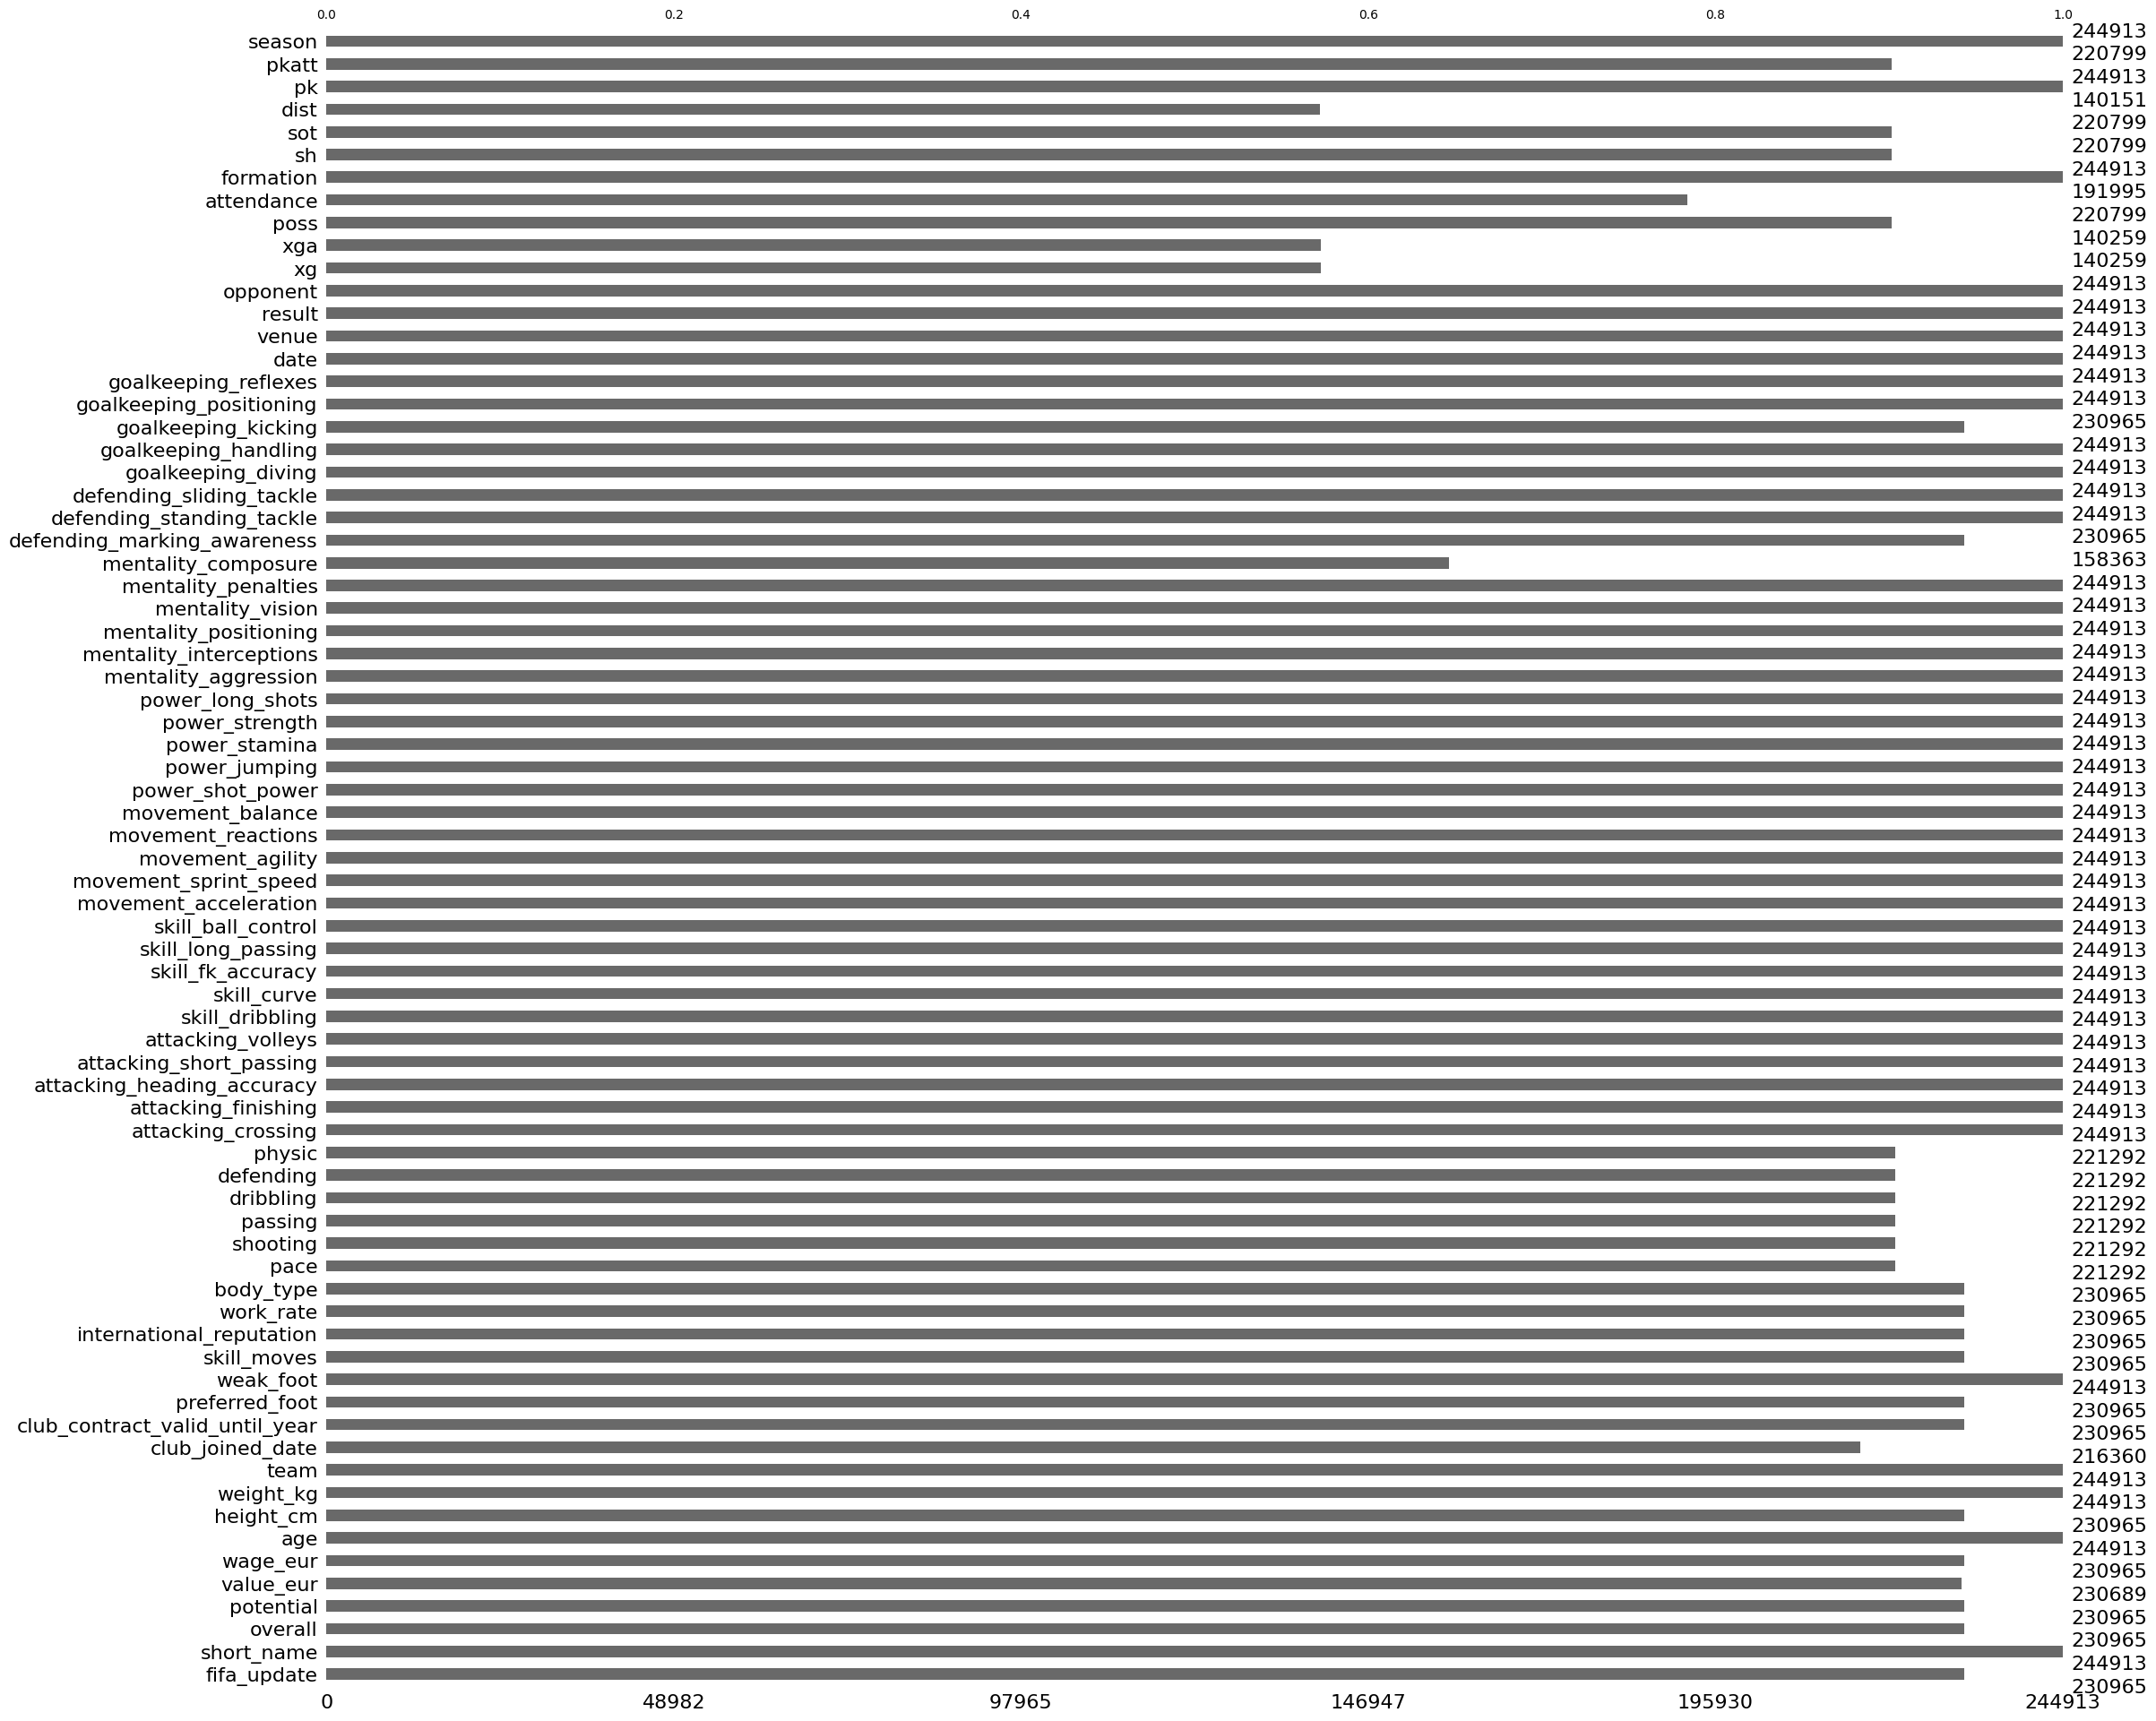

In [ ]:
msno.bar(df)

<Axes: >

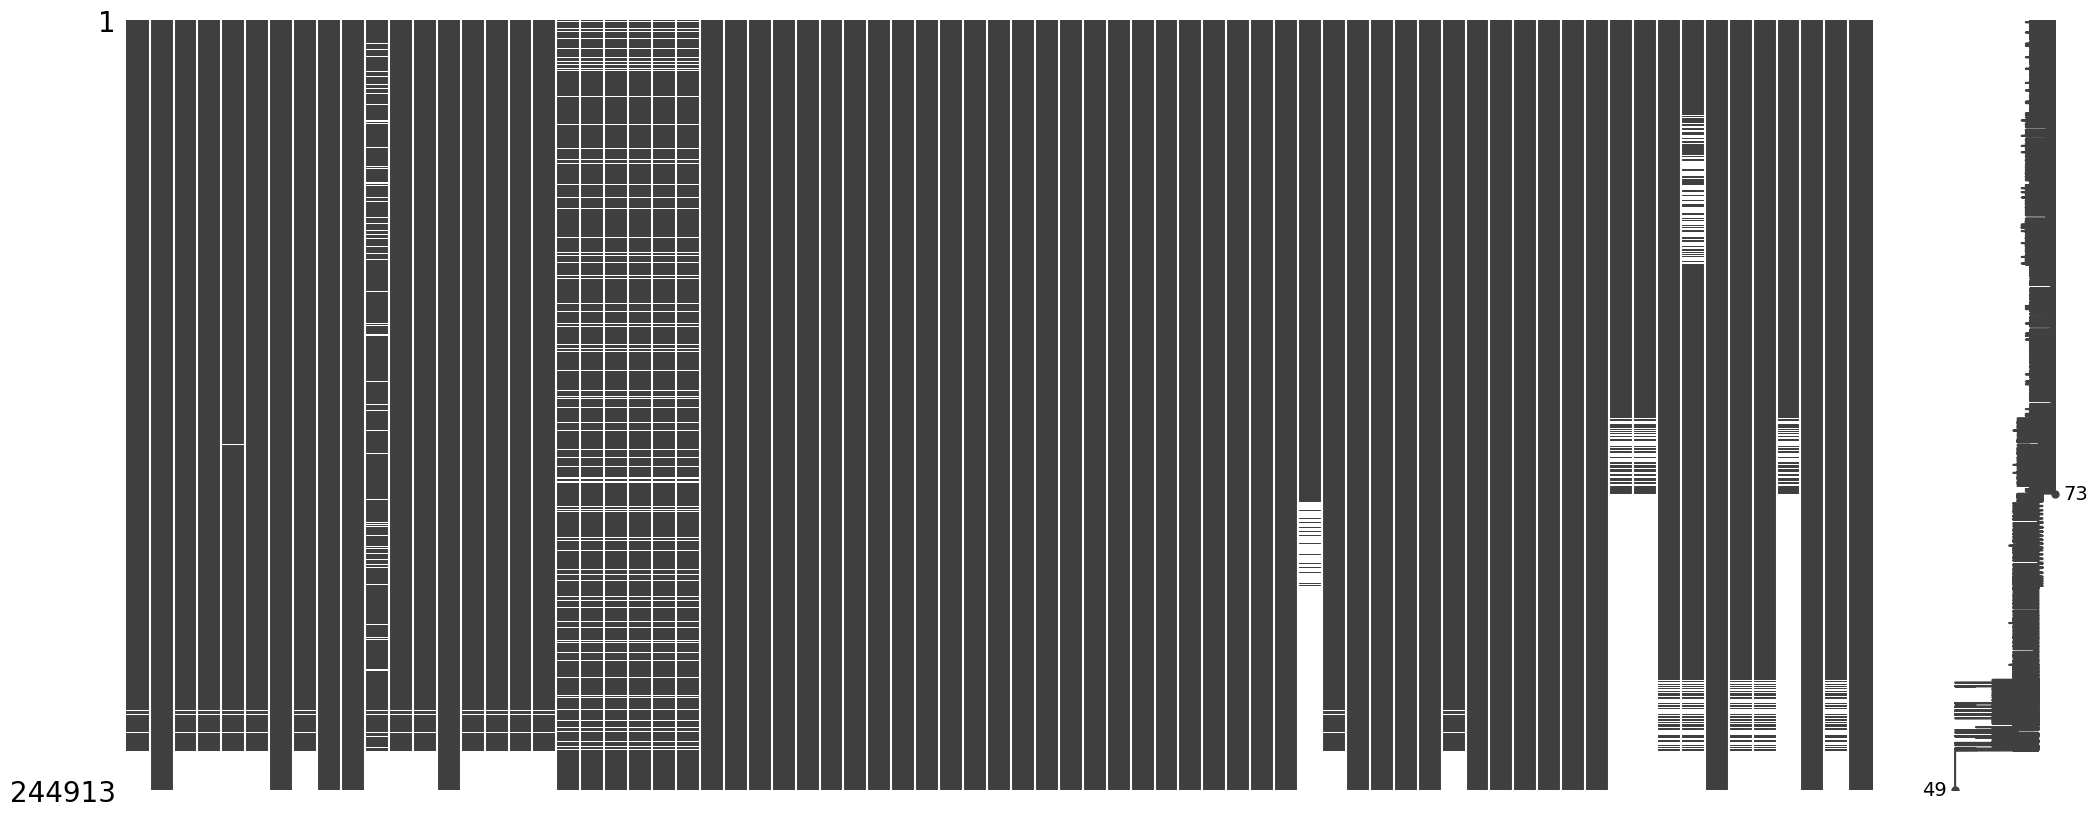

In [ ]:
msno.matrix(df)

In [ ]:
df = df.drop(['club_joined_date'], axis=1)

In [ ]:
df['preferred_foot'] = df['preferred_foot'].map({'Right':0,'Left':1})

In [ ]:
df = df.replace({'kg':''},regex=True)

In [ ]:
df['weight_kg'] = pd.to_numeric(df['weight_kg'],errors = 'coerce')

In [ ]:
df['attacking_skills'] = df[['attacking_finishing','attacking_crossing','attacking_heading_accuracy','attacking_short_passing', 'attacking_volleys']].mean(axis=1)
df=df.drop(['attacking_finishing','attacking_crossing','attacking_heading_accuracy','attacking_short_passing', 'attacking_volleys'], axis=1)

In [ ]:
df['ball_skill'] = df[['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control']].mean(axis=1)
df=df.drop(['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control'], axis=1)

In [ ]:
df['movement_speed_skills'] = df[['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions', 'movement_balance']].mean(axis=1)
df=df.drop(['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions', 'movement_balance'], axis=1)

In [ ]:
df['power_skills'] = df[['power_shot_power','power_jumping', 'power_stamina','power_strength','power_long_shots']].mean(axis=1)
df=df.drop(['power_shot_power','power_jumping', 'power_stamina','power_strength','power_long_shots'], axis=1)

In [ ]:
df['mentality_aggression_skills'] = df[['mentality_aggression','mentality_interceptions']].mean(axis=1)
df=df.drop(['mentality_aggression','mentality_interceptions'], axis=1)

In [ ]:
df['mentality_vision_skills'] = df[['mentality_positioning','mentality_vision', 'mentality_penalties']].mean(axis=1)
df=df.drop(['mentality_positioning','mentality_vision', 'mentality_penalties'], axis=1)

In [ ]:
df['defending_skills'] = df[['defending_marking_awareness','defending_standing_tackle', 'defending_sliding_tackle']].mean(axis=1)
df=df.drop(['defending_marking_awareness','defending_standing_tackle', 'defending_sliding_tackle'], axis=1)

In [ ]:
df['goalkeeping_skills'] = df[['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']].mean(axis=1)
df=df.drop(['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes'], axis=1)

In [ ]:
df = df.drop(['fifa_update','club_contract_valid_until_year'], axis=1)

In [ ]:
df = df.replace({"3-4-3◆": "3-4-3", "4-1-2-1-2◆": "4-1-2-1-2"})

In [ ]:
dummies = pd.get_dummies(df['formation'], drop_first = True)
dummies.head()

,3-2-4-1,3-3-3-1,3-4-1-2,3-4-3,3-5-1-1,3-5-2,4-1-2-1-2,4-1-3-2,4-1-4-1,4-2-2-2,4-2-3-1,4-2-4-0,4-3-1-2,4-3-2-1,4-3-3,4-4-1-1,4-4-2,4-5-1,5-3-2,5-4-1
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original
df = df.drop(columns=['formation'])

In [ ]:
dummies = pd.get_dummies(df['work_rate'], drop_first = True)
dummies.head()

,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [ ]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original
df = df.drop(columns=['work_rate'])

In [ ]:
dummies = pd.get_dummies(df['body_type'], drop_first = True)
dummies.head()

,Lean (170-185),Lean (185+),Normal (170-),Normal (170-185),Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [ ]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original
df = df.drop(columns=['body_type'])

In [ ]:
df.isnull().sum()

short_name              0
overall             13948
potential           13948
value_eur           14224
wage_eur            13948
                    ...  
Normal (185+)           0
Stocky (170-)           0
Stocky (170-185)        0
Stocky (185+)           0
Unique                  0
Length: 79, dtype: int64

<Axes: >

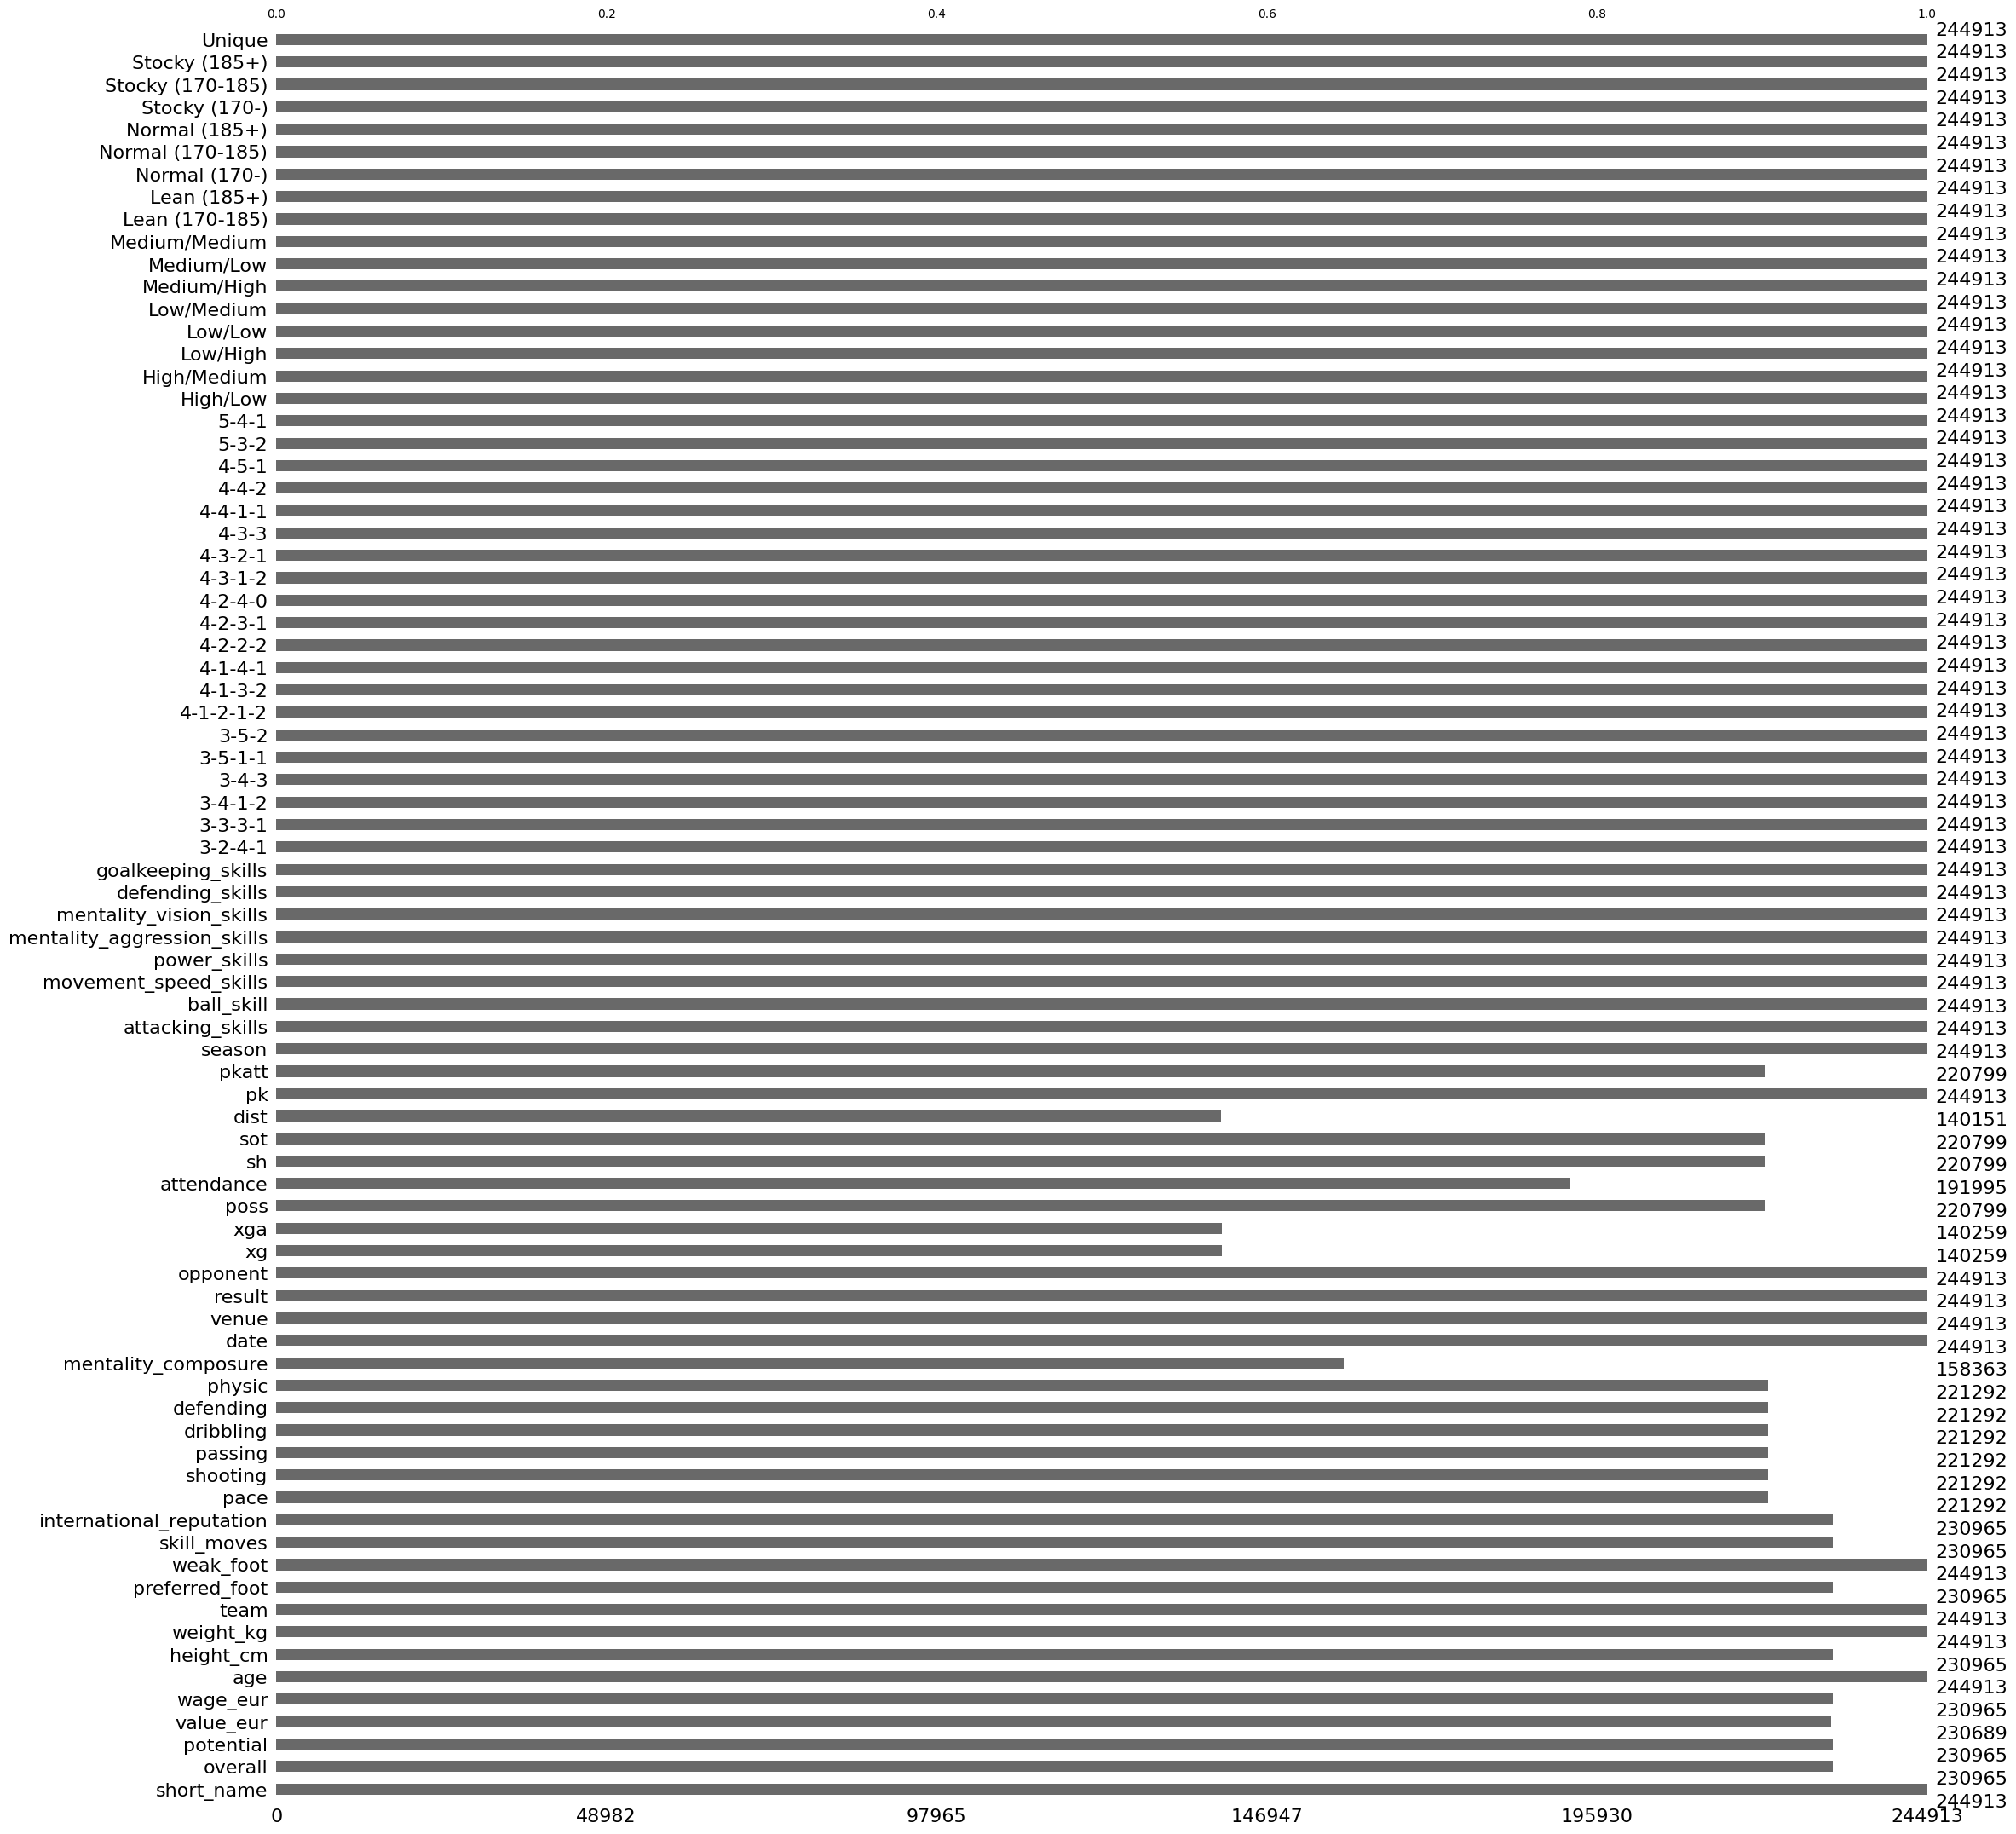

In [ ]:
msno.bar(df)

<Axes: >

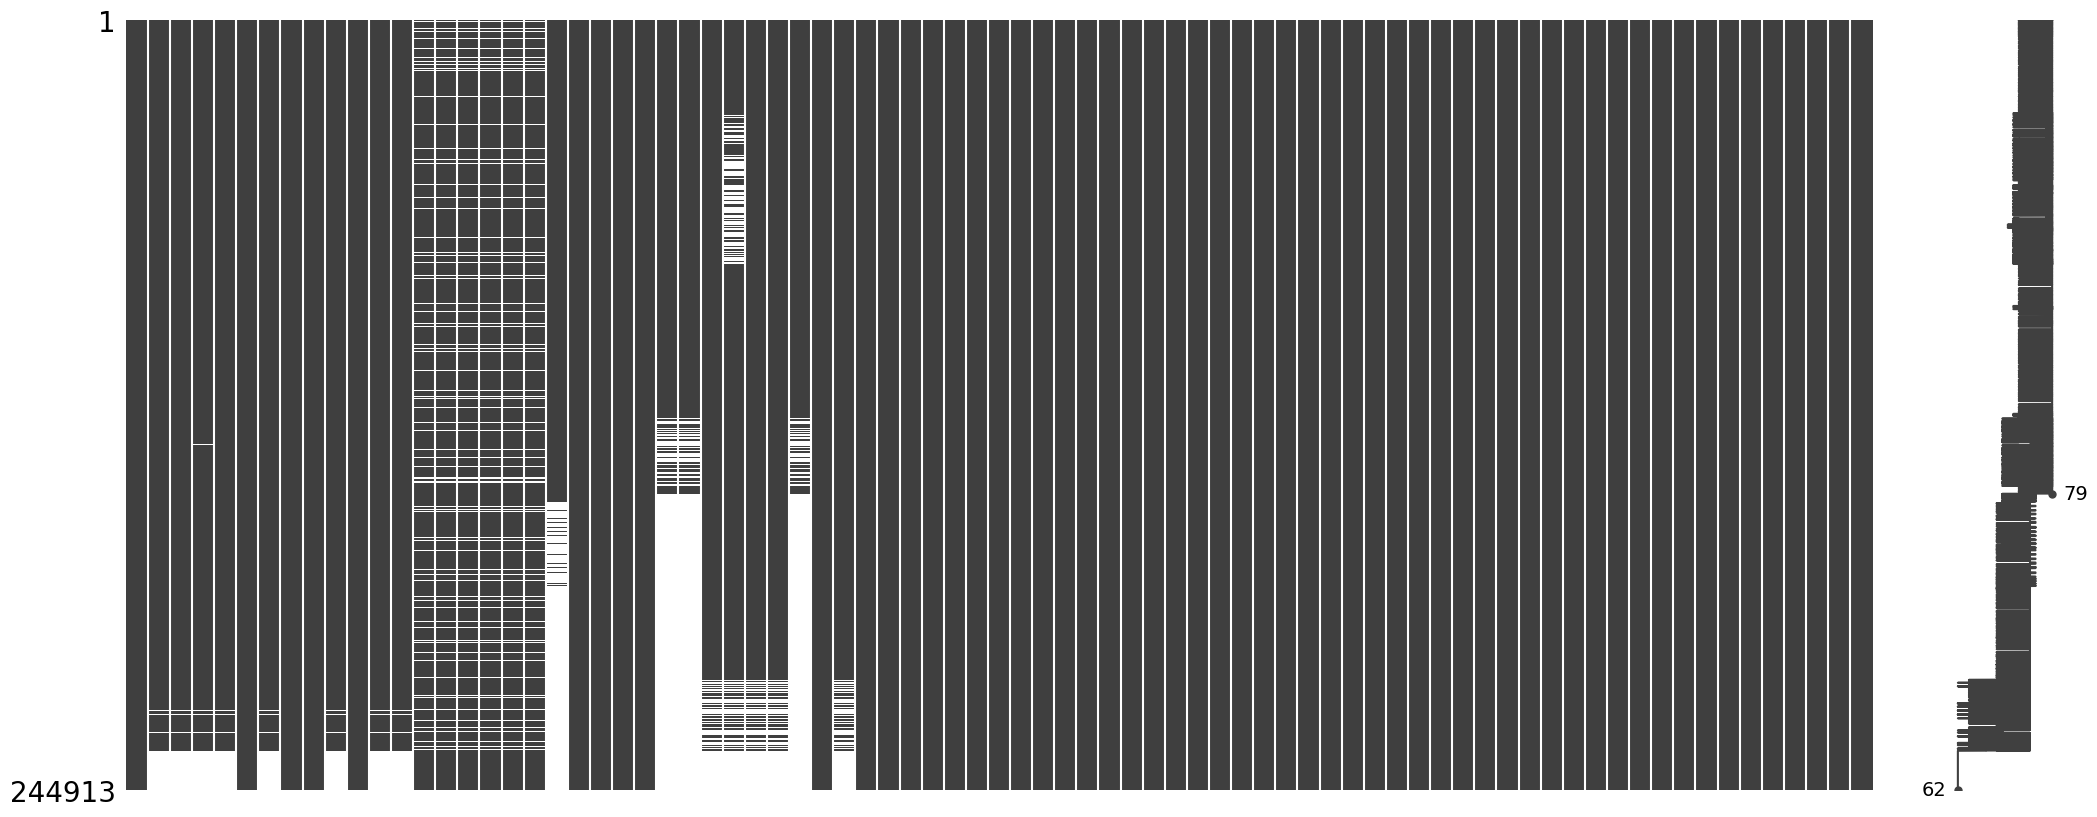

In [ ]:
msno.matrix(df)

In [ ]:
df

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,team,preferred_foot,...,Medium/Medium,Lean (170-185),Lean (185+),Normal (170-),Normal (170-185),Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique
0,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,Manchester City,0.0,...,0,0,0,0,0,0,0,0,0,1
1,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,Manchester City,0.0,...,0,0,0,0,0,0,0,0,0,1
2,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,Manchester City,0.0,...,0,0,0,0,0,0,0,0,0,1
3,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,Manchester City,0.0,...,0,0,0,0,0,0,0,0,0,1
4,K. De Bruyne,91.0,91.0,107500000.0,350000.0,31.0,181.0,75,Manchester City,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730675,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72,Southampton,NaN,...,0,0,0,0,0,0,0,0,0,0
9730676,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72,Southampton,NaN,...,0,0,0,0,0,0,0,0,0,0
9730677,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72,Southampton,NaN,...,0,0,0,0,0,0,0,0,0,0
9730678,M. Barnes,NaN,NaN,NaN,NaN,16.0,NaN,72,Southampton,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.fillna(df.mean())

<ipython-input-140-04e87d67d337>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
<ipython-input-140-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
d_grouped=df.groupby(['team', 'season', 'result','venue','opponent','date' ]).mean()

<ipython-input-141-f17dd61edd3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d_grouped=df.groupby(['team', 'season', 'result','venue','opponent','date' ]).mean()


In [ ]:
dfi = d_grouped.reset_index()

In [ ]:
df=dfi

In [ ]:
df

,team,season,result,venue,opponent,date,overall,potential,value_eur,wage_eur,...,Medium/Medium,Lean (170-185),Lean (185+),Normal (170-),Normal (170-185),Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique
0,Arsenal,2012,D,Away,Aston Villa,2012-11-24,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,Arsenal,2012,D,Away,Everton,2012-11-28,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,Arsenal,2012,D,Away,Manchester City,2012-09-23,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,Arsenal,2012,D,Away,Southampton,2013-01-01,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,Arsenal,2012,D,Away,Stoke City,2012-08-26,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,Wolverhampton Wanderers,2022,W,Home,Liverpool,2023-02-04,75.173913,80.000000,1.490109e+07,58826.086957,...,0.391304,0.217391,0.000000,0.130435,0.217391,0.304348,0.0,0.0,0.000000,0.130435
8136,Wolverhampton Wanderers,2022,W,Home,Nottingham Forest,2022-10-15,72.588235,79.352941,1.215294e+07,49411.764706,...,0.352941,0.205882,0.117647,0.088235,0.235294,0.205882,0.0,0.0,0.029412,0.088235
8137,Wolverhampton Wanderers,2022,W,Home,Southampton,2022-09-03,72.588235,79.352941,1.215294e+07,49411.764706,...,0.352941,0.205882,0.117647,0.088235,0.235294,0.205882,0.0,0.0,0.029412,0.088235
8138,Wolverhampton Wanderers,2022,W,Home,Tottenham Hotspur,2023-03-04,75.173913,80.000000,1.490109e+07,58826.086957,...,0.391304,0.217391,0.000000,0.130435,0.217391,0.304348,0.0,0.0,0.000000,0.130435


###COMPLETADO CON EL RIVAL

In [ ]:
d_compl = df
d_compl_2 = d_compl

In [ ]:
d_compl_2 = d_compl_2.drop(['team'], axis=1)

In [ ]:
d_compl_2=d_compl_2.rename(columns={'opponent':'team'})

In [ ]:
d_t=pd.merge(d_compl, d_compl_2, on=["date","team"],suffixes=("_t", "_o"))

In [ ]:
d_t

,team,season_t,result_t,venue_t,opponent,date,overall_t,potential_t,value_eur_t,wage_eur_t,...,Medium/Medium_o,Lean (170-185)_o,Lean (185+)_o,Normal (170-)_o,Normal (170-185)_o,Normal (185+)_o,Stocky (170-)_o,Stocky (170-185)_o,Stocky (185+)_o,Unique_o
0,Arsenal,2012,D,Away,Aston Villa,2012-11-24,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Arsenal,2012,D,Away,Everton,2012-11-28,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Arsenal,2012,D,Away,Manchester City,2012-09-23,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Arsenal,2012,D,Away,Southampton,2013-01-01,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Arsenal,2012,D,Away,Stoke City,2012-08-26,74.259944,78.688390,1.031533e+07,54528.491546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,Wolverhampton Wanderers,2022,W,Home,Liverpool,2023-02-04,75.173913,80.000000,1.490109e+07,58826.086957,...,0.391304,0.086957,0.217391,0.000000,0.173913,0.000000,0.0,0.043478,0.043478,0.391304
8136,Wolverhampton Wanderers,2022,W,Home,Nottingham Forest,2022-10-15,72.588235,79.352941,1.215294e+07,49411.764706,...,0.404255,0.255319,0.127660,0.000000,0.255319,0.276596,0.0,0.042553,0.042553,0.000000
8137,Wolverhampton Wanderers,2022,W,Home,Southampton,2022-09-03,72.588235,79.352941,1.215294e+07,49411.764706,...,0.363636,0.303030,0.121212,0.000000,0.303030,0.181818,0.0,0.030303,0.030303,0.000000
8138,Wolverhampton Wanderers,2022,W,Home,Tottenham Hotspur,2023-03-04,75.173913,80.000000,1.490109e+07,58826.086957,...,0.217391,0.217391,0.130435,0.000000,0.217391,0.130435,0.0,0.000000,0.043478,0.260870


In [ ]:
dummies = pd.get_dummies(d_t['venue_t'], drop_first = True)
dummies.head()

,Home
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Añadimos las variables binarias al DataFrame
d_t = pd.concat([d_t, dummies], axis = 1)

# Eliminamos la vairable original
d_t = d_t.drop(columns=['venue_t'])

In [ ]:
d_t=d_t.drop(['result_o','season_o','venue_o'], axis=1)

In [ ]:
df=d_t.drop(['team','season_t','opponent','date','xga_t','xga_o'], axis=1)

In [ ]:
df['result_t'] = df['result_t'].map({'L':0,'D':0,'W':1})

In [ ]:
df

,result_t,overall_t,potential_t,value_eur_t,wage_eur_t,age_t,height_cm_t,weight_kg_t,preferred_foot_t,weak_foot_t,...,Lean (170-185)_o,Lean (185+)_o,Normal (170-)_o,Normal (170-185)_o,Normal (185+)_o,Stocky (170-)_o,Stocky (170-185)_o,Stocky (185+)_o,Unique_o,Home
0,0,74.259944,78.688390,1.031533e+07,54528.491546,22.083333,182.588505,75.750000,0.238595,3.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
1,0,74.259944,78.688390,1.031533e+07,54528.491546,22.083333,182.588505,75.750000,0.238595,3.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
2,0,74.259944,78.688390,1.031533e+07,54528.491546,22.083333,182.588505,75.750000,0.238595,3.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
3,0,74.259944,78.688390,1.031533e+07,54528.491546,23.666667,182.588505,69.666667,0.238595,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
4,0,74.259944,78.688390,1.031533e+07,54528.491546,22.083333,182.588505,75.750000,0.238595,3.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,1,75.173913,80.000000,1.490109e+07,58826.086957,24.956522,181.695652,75.304348,0.217391,3.304348,...,0.086957,0.217391,0.000000,0.173913,0.000000,0.0,0.043478,0.043478,0.391304,1
8136,1,72.588235,79.352941,1.215294e+07,49411.764706,24.176471,182.352941,75.382353,0.264706,3.264706,...,0.255319,0.127660,0.000000,0.255319,0.276596,0.0,0.042553,0.042553,0.000000,1
8137,1,72.588235,79.352941,1.215294e+07,49411.764706,24.176471,182.352941,75.382353,0.264706,3.264706,...,0.303030,0.121212,0.000000,0.303030,0.181818,0.0,0.030303,0.030303,0.000000,1
8138,1,75.173913,80.000000,1.490109e+07,58826.086957,24.956522,181.695652,75.304348,0.217391,3.304348,...,0.217391,0.130435,0.000000,0.217391,0.130435,0.0,0.000000,0.043478,0.260870,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8140 entries, 0 to 8139
Columns: 144 entries, result_t to Home
dtypes: float64(142), int64(1), uint8(1)
memory usage: 9.0 MB


In [ ]:
#df.to_csv("DT.csv")